# Introduction to Regression with Neural Network in Tensorflow

Regression is all about **predicting a number** of some sort. for example, in image detection, trying to predict the coordinates of boxes or in other words, train a neural network regression for object detection model, for prediction of coordinate of the box around the target object. What is covered in this:
* Architecture of neural network regression model
* Input (features) shapes and output(labels) shapes of the model
* custom data to view and fit
* steps in Modelling:
  1. creating a Model,
  2. Compiling a model,
  3. Fitting a Model,
  4. Evaluate a Model
* Different Evaluation methods
* Saving and loading models, so if have a saved trained model already we can load it for other applications for going forward.




## Regression inputs and outputs
In most of the times, it is important to figurout what are the appropriate inputs for the model, and fig out what going to be the output. need to check the relationship b/w features and labels. This might involve involving one-hot encoding, for numerical encoding.

## Anatomy of Neural Network
There is **Input Layer**, **Hidden Layer** and **Output Layer**.
* **Input Layer:** This is where Data goes in.
* **Hidden Layer:** It can vary from having one hidden layer to several hundreds of layers, depends on problem (with as many neurons as possible). This is where the neural network learns pattern in the data.
* **Output Layer:** This is where the output; learned representation or prediction probabilities.





## Architecture of neural network of Regression Algorithm
The architecture is based on the following Hyperparameters:
* input Layer Shape - Same shape (or less) as no of features
* Hidden layer(s) - problem specific, min; 1 and Max; unlimited
* Neuron per hidden layer - problem specific (generally 10 - 100)
* Output Layer Shape - Same shape as desired prediction
* Hidden activation - activation function (usually ReLU)
* Output ativation - depends on the problem (in regression usually None or ReLU)
* Loss Function - MSE or MAE, of Huber (combination of both in case of outliers)
* Optimizer - alter the weights and learning rate, to reduce Losses of neural network. Usually SGD (stochastic Gradient descent), Adam,..


In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Steps in modelling with TensorFlow
1. Creating a Model - define the input & output layers, as well as hidden layers of a deep learning Model.
2. Compiling a model - define a Loss finction, optimizer & evaluation metrics.
3. Fitting a model - letting a model try to find patterns b/w features and labels.

In [2]:
# set random seed
tf.random.set_seed(42)


## Improving our Model
It is iportant to understand, the improvement comes by altering the steps we took to create a model.

1. Creating a model:
  * add mode layers,
  * increase the no of neuron in each hidden layers
  * change/ alter the activation function of each layer.
2. Compiling a model:
  * change the optimizer or alter the learning rate of optimizer
3. Fitting a model:
  * increase epochs (leave it training for longer) or provide more data (more examples to learn from)


The learning rate is one single important hyperparameter of many different neural networks.

## Evaluate a Model
When it comes to model evaluation, visualization plays an important role:
1. Visualize the data - what data looks like and what type of data it is.
2. Visualize the model itself - what does our model look like?
3. Visualize the model training - how does a model perform while it learns?
4. Visualize the model predictions - how do the predictions of a model line up against the ground truth (the original labels)

In [3]:
# Make a dataset
X = tf.range(-100,100,4)
y = X+10

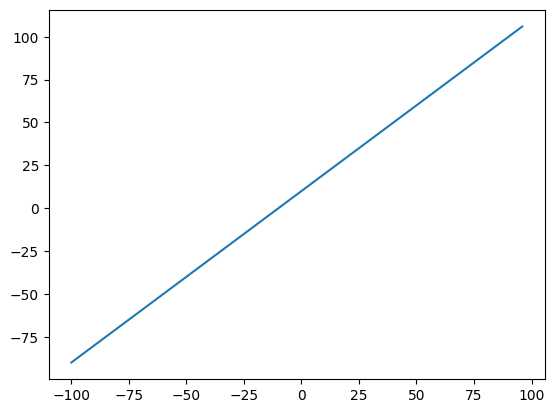

In [4]:
#visualize the data
import matplotlib.pyplot as plt

plt.plot(X,y)

### Split the data
* **Training Set** - 70-80% of total data. model trains on this data and learn patterns
* **Validation set** - 15-10% of total data. The model gets tuned on this data.
* **Test set** - 15-20% of data. There the mode test its patterns learned and tweeked on training and validation set.

The idea behind the split is **Generalization**, which means the ability for a Machine learning model to perform on data it hasent seen before.

In [5]:
len(X)

50

In [6]:
# split the data into train, validation and testing
X_train = X[:40]         # first 40 are training sample 80%
y_train = y[:40]         #

X_test = X[40:]
y_test = y[40:]

len(X), len(X_train), len(y_train), len(X_test), len(y_train)

(50, 40, 40, 10, 40)

Text(0.5, 1.0, 'Data')

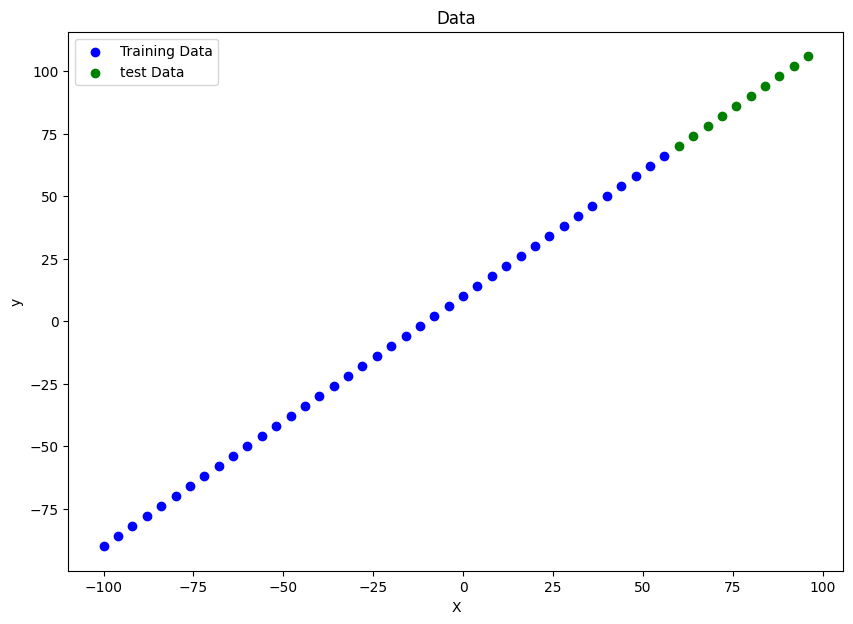

In [7]:
# visualize the data
plt.figure(figsize = (10,7))

# plot train data
plt.scatter(X_train, y_train, c='b', label = "Training Data")


# plot test data
plt.scatter(X_test, y_test, c='g', label = "test Data")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data")

Visualization can help anytime, to get a through picture.


Now we want to build a model to learn from train and predict on test.

In [8]:
# building a Neural network

# Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1], name = "input_Layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_summary1")

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# visualize a model
model.summary()

Model: "model_summary1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_Layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The table above shows:
* **Dense** Layer - Fully connected (all of the input neurons connected to every neuron in hidden layer) layer
* output shape - we have 1 input and 1 ouitput.
* no of parameters 2

1. Total params: no of parameters the model is being trained on. we have 2 X & y
2. Trainable params: The parameters(pattern) the model can update as it trains. When total params = trainable params, this meas all the params are trainable.
3. Non-trainable params: parameters dont get updated during training. This is usually parameters from other models during **transfer learning**

Model: "sequential" becomes "sequential_1", because we ran the model twice.
* For 20 neurons, we have an output , so 20 output
* for 20 neurons, and each neuron with 2 trainable params, leads to 40 params.

In [9]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

### plot the model

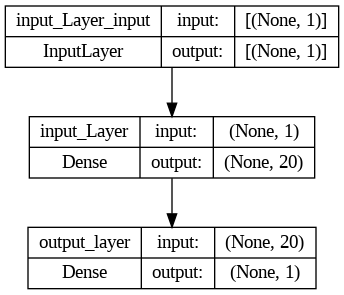

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

This shows the input layer and output layer. input layer is 1, b/c we set the input layer 1, a neurons 20. Output layer from 20 - 1

### Visualize our Model's prediction

plot prediction values against y test

In [11]:
# making predictions
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 148ms/step


(array([[ 70.508026],
        [ 75.09403 ],
        [ 79.68004 ],
        [ 84.26602 ],
        [ 88.85201 ],
        [ 93.438   ],
        [ 98.02401 ],
        [102.61001 ],
        [107.196   ],
        [111.78199 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [12]:
def plot_prediction(train_data, train_labels, test_data, test_labels, predictions):
  """
  plots training, test & compares the predictions to test labels
  """
  plt.figure(figsize=(10,7))

  # plot train data
  plt.scatter(train_data, train_labels, c='b', label = "Training Data")

  # plot test data
  plt.scatter(test_data, test_labels, c='g', label = "test Data")

  # plot predictions
  plt.scatter(test_data, predictions, c='r', label = "predictions")
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Data")

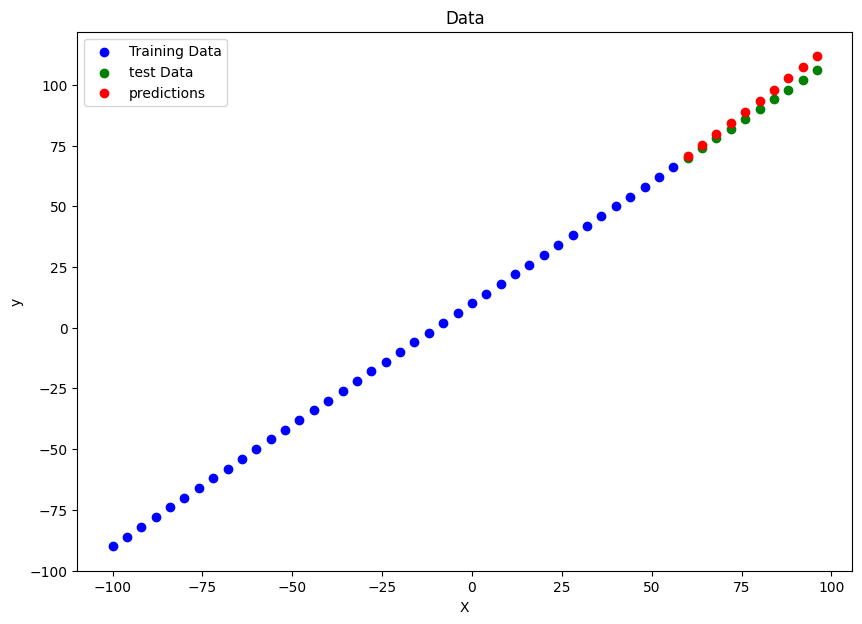

In [13]:
plot_prediction(X_train, y_train, X_test, y_test, y_pred)

Our prediction is way offf

### Evaluating the model's prediction with regression evaluation metrics
Depending on the problem in hand:
* MAE: (Mean Absolute Error) on avg how wrong each of the prediction of the model `tf.keras.losses.MAE()` OR `tf.metrics.mean_absolute_error()` - can be used in any regression problem
* MSE: (Mean Square Error) Square of avg errors `tf.keras.losses.MSE()` OR `tf.metrics.mean_square_error()` - most useful when largere errors are more significant than small errors.
* huber: combination of MAE & MSE `tf.keras.losses.Huber()`

In [14]:
# Evaluate the model in Test set (we already set losses as MAE)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 285ms/step - loss: 3.1450 - mae: 3.1450


[3.1450133323669434, 3.1450133323669434]

In [15]:
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.508026],
        [ 75.09403 ],
        [ 79.68004 ],
        [ 84.26602 ],
        [ 88.85201 ],
        [ 93.438   ],
        [ 98.02401 ],
        [102.61001 ],
        [107.196   ],
        [111.78199 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [16]:
# Getting rid of 1 dimension with squeeze
y_pred = tf.squeeze(tf.constant(y_pred))
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.508026,  75.09403 ,  79.68004 ,  84.26602 ,  88.85201 ,
        93.438   ,  98.02401 , 102.61001 , 107.196   , 111.78199 ],
      dtype=float32)>

In [17]:
# calc the MAE (manually), also we know y_pred isnt a tensor
tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)    # same value as above.



<tf.Tensor: shape=(), dtype=float32, numpy=3.1450143>

In [18]:
# manually calc MSE
tf.keras.losses.MSE(y_true= y_test, y_pred=y_pred)   # generally the MSE is larger than MAE

<tf.Tensor: shape=(), dtype=float32, numpy=12.724088>

In [19]:
def make_tensor(array):
  new = tf.constant(array)
  val = tf.squeeze(new)

  return val

### Running Experiments to improive our Model

ML pretictioner motto:
```
Build a model -> fit it -> evaluate it-> tweak it -> fit it -> evaluate it -> tweak it -> fit it -. evaluate it -> ...
```
1. Get more data
2. make model larger - more layers or more units (hidden neurons)
3. train for longer - increase epochs


#### Experiments:
1. Model-1: same as original, 1 layer, trained for 100 epochs
2. Model-2: 2 layers, trained for 100 epochs
3. Model-3: 2 layers, trained for 500 epochs

**Model-1**

In [20]:
# set random seed
tf.random.set_seed(42)

# 1. Build Model-1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,), name = "input_Layer")           # only 1 hidden neuron
])

# 2. Compile
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 45.3365 - mae: 45.3365
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 14.7631 - mae: 14.7631
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 13.8725 - mae: 13.8725
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 7.5863 - mae: 7.5863
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.9931 - mae: 11.9931
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 9.2802 - mae: 9.2802
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 8.4462 - mae: 8.4462
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0425 - mae: 9.0425
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.4235 - mae: 18.4235
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9382 - mae: 9.9382
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 72ms/step


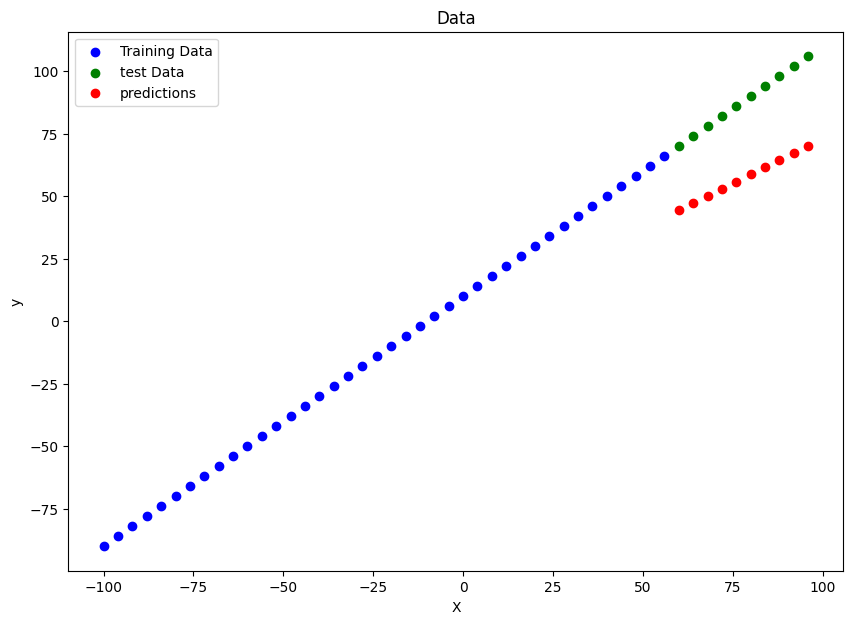

In [21]:
# make prediction & visualizations
y_pred_1 = model_1.predict(X_test)

# plot X, Y & Y-pred
plot_prediction(X_train, y_train, X_test, y_test, y_pred_1)


In [22]:
y_pred_1 = make_tensor(y_pred_1)

mae_1 = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred_1)
mse_1 = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.722296>,
 <tf.Tensor: shape=(), dtype=float32, numpy=954.37463>)

**Model-2**

In [23]:
# split the data into train, validation and testing
X_train = X[:40]         # first 40 are training sample 80%
y_train = y[:40]         #

X_test = X[40:]
y_test = y[40:]

len(X), len(X_train), len(y_train), len(X_test), len(y_train)

(50, 40, 40, 10, 40)

In [24]:
# 1. Build Model-1
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (1,), name = "Input_Layer"),           # 10 hidden neuron in 1st layer
    tf.keras.layers.Dense(1, name = "Output_layer")                               # 1 hidden neuron in the last layer
])

# 2. Compile
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 11ms/step - loss: 97.5537 - mae: 97.5537
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 30.1129 - mae: 30.1129
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 20.9166 - mae: 20.9166
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 13.5141 - mae: 13.5141
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 18.2084 - mae: 18.2084
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 8.6130 - mae: 8.6130
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 12.4558 - mae: 12.4558
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 11.0378 - mae: 11.0378
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 39.1928 - mae: 39.1928
Epoch 10/100
2/2 [==============================] - 0s 37ms/step - loss: 26.7471 - mae: 26.7471
Epoch 11/100
2/2 [==============================] -

Appearently loss increases. now check the predictions and visualize it.

1/1 [==============================] - 0s 82ms/step


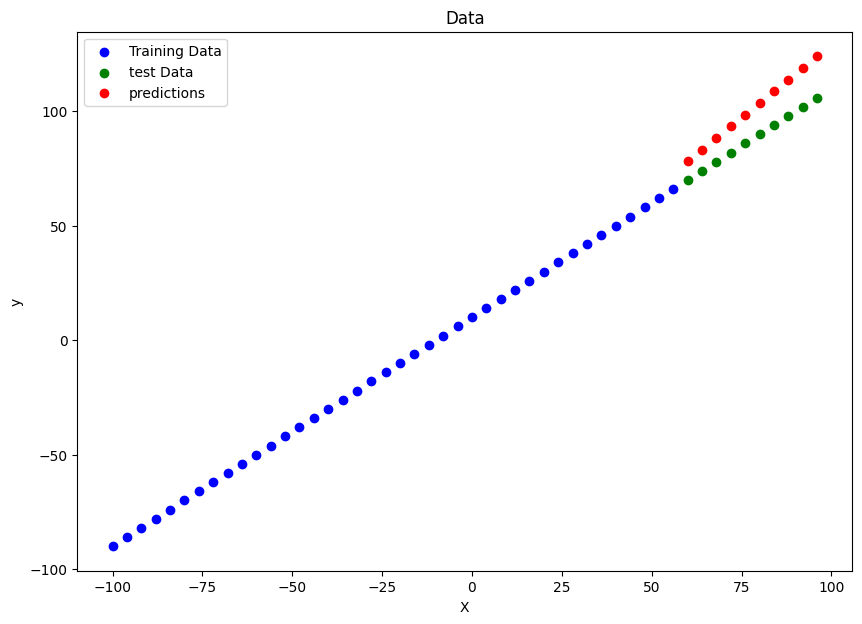

In [25]:
# make prediction & visualizations
y_pred_2 = model_2.predict(X_test)

# plot X, Y & Y-pred
plot_prediction(X_train, y_train, X_test, y_test, y_pred_2)

Loos like an improvement


In [26]:
y_pred_2 = make_tensor(y_pred_2)

mae_2 = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred_2)
mse_2 = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.129506>,
 <tf.Tensor: shape=(), dtype=float32, numpy=182.32626>)

**Model-3**

In [27]:
# split the data into train, validation and testing
X_train = X[:40]         # first 40 are training sample 80%
y_train = y[:40]         #

X_test = X[40:]
y_test = y[40:]

len(X), len(X_train), len(y_train), len(X_test), len(y_train)

(50, 40, 40, 10, 40)

In [28]:
# 1. Build Model-3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (1,), name = "Input_Layer"),           # 10 hidden neuron in 1st layer
    tf.keras.layers.Dense(1, name = "Output_layer")                               # 1 hidden neuron in the last layer
])

# 2. Compile
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 23.9095 - mse: 858.9789
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 10.0141 - mse: 167.4866
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 22.1555 - mse: 717.4415
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 12.7537 - mse: 221.4398
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 14.0292 - mse: 240.7389
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2446 - mse: 141.5108
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.2654 - mse: 193.6007
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.9202 - mse: 138.5577
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.3668 - mse: 2282.5046
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.8969 - mse: 942.7988
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 87ms/step


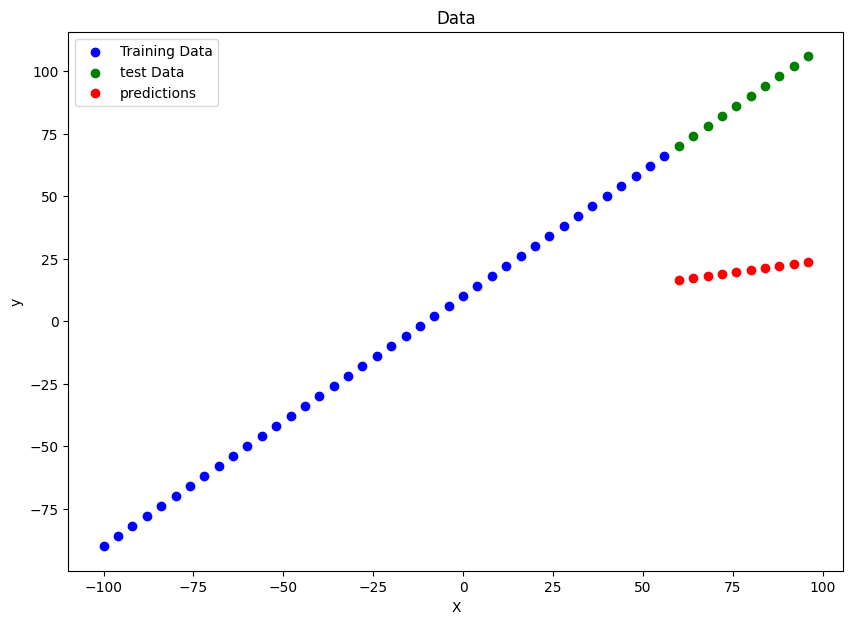

In [29]:
# make prediction & visualizations
y_pred_3 = model_3.predict(X_test)

# plot X, Y & Y-pred
plot_prediction(X_train, y_train, X_test, y_test, y_pred_3)

Goes more off. Case of overfitting.

In [30]:
y_pred_3 = make_tensor(y_pred_3)

mae_3 = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred_3)
mse_3 = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.9894>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4707.0024>)

### Comparing the Models


In [31]:
import pandas as pd

results = [["model_1", mae_1.numpy(), mse_1.numpy()],
           ["model_2", mae_2.numpy(), mse_2.numpy()],
           ["model_3", mae_3.numpy(), mse_3.numpy()]]

df = pd.DataFrame(results, columns = ["model", "mae", "mse"])
df

,model,mae,mse
0,model_1,30.722296,954.374634
1,model_2,13.129506,182.326263
2,model_3,67.989403,4707.002441


It appears that model_2 is a better option among all models

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Goal: to reduce the time b/w experiments
* TensorBoard - lib help track modelling experiments
* Weights & Biases - A tools to track all kinds of ML experiments (plugs straight into TensorBoard)

## Saving our Model
Saving our model allows us to use them outside google colab such as:
* Web application,
* Mobile application.

There are 2 formats to save a model:
1. The SaveModel format
2. The HDF5 (Hierarchical Data Format) file - universal format and can be passed to many other different programing applications.

For both the methods, there is a simpler and same method to load file from any of format; `tf.keras.models.load_model("file path")`

In [33]:
# save model using the Savedmodel format
model_2.save("best_model_SavedModel_format")

In the file section, a folder by the name **best_model_SavedModel_format** is saved. Inside, we got assets & variable folder. Further there is a file by the name saved_model.pb (protobuf file). In TensorFlow, the protbuf file contains the graph definition as well as the weights of the model. Thus, a pb file is all you need to be able to run a given trained model.

In [34]:
# saving out model in HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In the file section, we get a file of .h5 format.

### Loading a saved Model

In [35]:
loded_Savedmodel_model = tf.keras.models.load_model("best_model_SavedModel_format")
loded_Savedmodel_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Saved model is same as model 2, as architecture confirms it. however, to check more, we need to compare the predictions..

In [36]:
# compare predictions from mode_2 to SavedModel_format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds =loded_Savedmodel_model.predict(X_test)

# though both spits a numpy array, if require we can change them to tensors
model_2_preds == loaded_SavedModel_format_preds    # checked

1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 86ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [37]:
# loading HDF5 model
hdf5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
hdf5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# check model
loaded_hdf5_model_preds = hdf5_model.predict(X_test)
loaded_hdf5_model_preds == model_2_preds                  # checked

1/1 [==============================] - 0s 80ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A Larger Example

In [39]:
# import Required Lib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocess the Data

In [44]:
df["sex"].unique(), df["region"].unique(), df["smoker"].unique()

(array(['female', 'male'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object),
 array(['yes', 'no'], dtype=object))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### one-hot encode the categorical data

In [45]:
# using pandas dummys
new_df = pd.get_dummies(df)
new_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


So with one-hot encoding, a representative category gets an interger value of 1, rest of the options gets 0. This is how a whole dataframe can be converted to the numerical dataframe, useful for building nueral network. So **charges** is our labels.

Way forward:
* create explicitly features and label
* create Training & Test set
* Build a Neural Network

#### Create **feature** and **label** Datasets

In [47]:
features = new_df.loc[:, new_df.columns != "charges"]
labels = new_df.loc[:, new_df.columns == "charges"]


In [55]:
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   smoker_yes        1338 non-null   uint8  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.9 KB


In [50]:
labels.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


#### Create Training and Test set

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
len(features), len(X_train), len(X_test)

(1338, 1070, 268)

#### Neural Network

In [64]:
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (11,), name = "input_Layer"),
    tf.keras.layers.Dense(1, name = "output_Layer")
])

# Compile a model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8753.0859 - mae: 8753.0859
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7860.7046 - mae: 7860.7046
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7599.3374 - mae: 7599.3374
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.8218 - mae: 7537.8218
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7705.8096 - mae: 7705.8096
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.1846 - mae: 7610.1846
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7594.0825 - mae: 7594.0825
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7788.3853 - mae: 7788.3853
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7597.5205 - mae: 7597.5205
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7682.0117 - mae: 7682.0117

In [61]:
# check the results of model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8875.5215 - mae: 8875.5215


[8875.521484375, 8875.521484375]

In [62]:
y_train.median(), y_train.mean()

(charges    9575.4421
 dtype: float64,
 charges    13346.089736
 dtype: float64)

The model perform even worst on test dataset. This shows our model is off by \$8875. Though the avg of train dataset is (mean: \$13345 & median: \$9575). With the consideration of avg, out insurance_model is way poor in performance. This means, we will be charging someone around \$700, when in reality, we should be charging the policyholder around \$9575 (by median). To improve performane:
* create one more hidden layer + add activation function
* increase epochs
* Try adding adam optimizer and adjust learning rate

In [71]:
# create one more additional hidden layer and change the optimizer
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (11,), name = "input_Layer"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name = "output_Layer")
])

# Compile a model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13295.7422 - mae: 13295.7422
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13152.8887 - mae: 13152.8887
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12838.1475 - mae: 12838.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12211.4482 - mae: 12211.4482
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11146.0000 - mae: 11146.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9725.2051 - mae: 9725.2051
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8343.0449 - mae: 8343.0449
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.8101 - mae: 7586.8101
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7435.0508 - mae: 7435.0508
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7412.5483 - mae:

if model shows nan, it means the complexiety is so much, model cant learn anything.

In [72]:
# check the results of model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5066.2212 - mae: 5066.2212


[5066.22119140625, 5066.22119140625]

Previously:
* loss: 8875.5215 - mae: 8875.5215

now:
* loss: 5066.2212 - mae: 5066.2212

This shows the loss actually decreases, an improvement in the model.


In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
# increase the epochs to 500 + add early stopping

tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (11,), name = "input_Layer"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name = "output_Layer")
])

# Compile a model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Early Stopping
early_stopping = EarlyStopping(monitor='mae', patience=50, verbose=1, restore_best_weights=True)

# Fit the model
insurance_model.fit(X_train, y_train, epochs =500, callbacks=[early_stopping])

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13313.2998 - mae: 13313.2998
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13179.4023 - mae: 13179.4023
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12894.5879 - mae: 12894.5879
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12306.2998 - mae: 12306.2998
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11268.7637 - mae: 11268.7637
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 9840.9688 - mae: 9840.9688
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8417.8662 - mae: 8417.8662
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7604.5044 - mae: 7604.5044
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7439.4443 - mae: 7439.4443
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7416.0068 - mae:

The best mae is 3473 at 405 epoch - almost halved the error


In [78]:
# check the results of model on test data
insurance_model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 3171.3401 - mae: 3171.3401


[3171.340087890625, 3171.340087890625]

Previously:
* loss: 8875.5215 - mae: 8875.5215
* loss: 5066.2212 - mae: 5066.2212

now:
* loss: 3171.3401 - mae: 3171.3401

This shows the loss actually decreases, an improvement in the model.

In [79]:
# increase the epochs to 500 + add early stopping

tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (11,), name = "input_Layer"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name = "output_Layer")
])

# Compile a model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Early Stopping
early_stopping = EarlyStopping(monitor='mae', patience=50, verbose=1, restore_best_weights=True)

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs =500, callbacks=[early_stopping])

Epoch 1/500
34/34 [==============================] - 2s 3ms/step - loss: 13270.2578 - mae: 13270.2578
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13076.5430 - mae: 13076.5430
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12680.7041 - mae: 12680.7041
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11925.0615 - mae: 11925.0615
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10707.7061 - mae: 10707.7061
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9231.9990 - mae: 9231.9990
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7970.1577 - mae: 7970.1577
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7470.6021 - mae: 7470.6021
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7403.9160 - mae: 7403.9160
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7384.3857 - mae:

Text(0.5, 0, 'epochs')

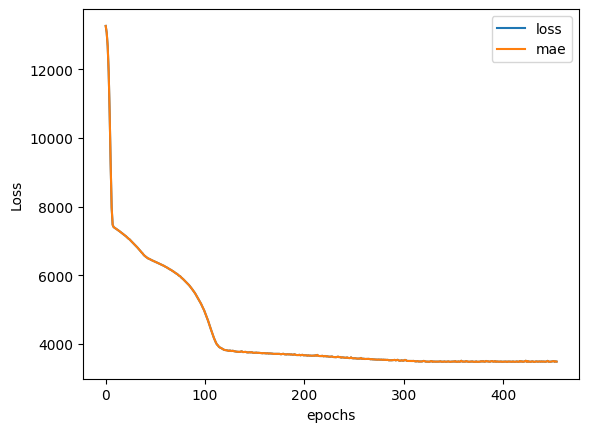

In [80]:
# plot history (also known as training curve OR loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

### Preprocession Data: Normalization & Standardization
Neural network tend to prefer normalization

In [81]:
features

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1
